# ACCESS-S Climatology Precipitation Plotting

In [1]:
import xarray as xr 
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import numpy as np 
import cmocean

### defining a function to plot the data

In [4]:
def plot_pr_climatology(pr_file, season, gridlines = False):
    """Plots The Precipitaion Climatology.

    Args:
        pr_file (str): precipitaion data file
        season (str): season (3 letter abbreviation e. g. JJA)
        gridlines (bool): selects whether True or False
    """
    #accesscm2_pr_file = 'data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'
    #rain_anom = 'rain.forecast.anom.monthly.nc'
    
    dset = xr.open_dataset(pr_file)

    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

    clim.data = clim.data * 86400
    clim.attrs['units'] = 'mm/day'

    fig = plt.figure(figsize=[18,7])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_extent([140., 158., -12., 0])
    clim.sel(season=season).plot.contourf( 
        ax=ax,
        levels=np.arange(0, 13.5, 1.5),
        extend='max',
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'label': clim.units},
       cmap=cmocean.cm.haline_r
    )
    ax.coastlines()

    if gridlines:
        plt.gca().gridlines()

    model = dset.attrs['source_id']
    title = f'{model} precipitaion climatology ({season})'
    plt.title(title)

    plt.show() 

In [3]:
help(plot_pr_climatology)

Help on function plot_pr_climatology in module __main__:

plot_pr_climatology(pr_file, season, gridlines=False)
    Plots The Precipitaion Climatology.
    
    Args:
        pr_file (str): precipitaion data file
        season (str): season (3 letter abbreviation e. g. JJA)
        gridlines (bool): selects whether True or False



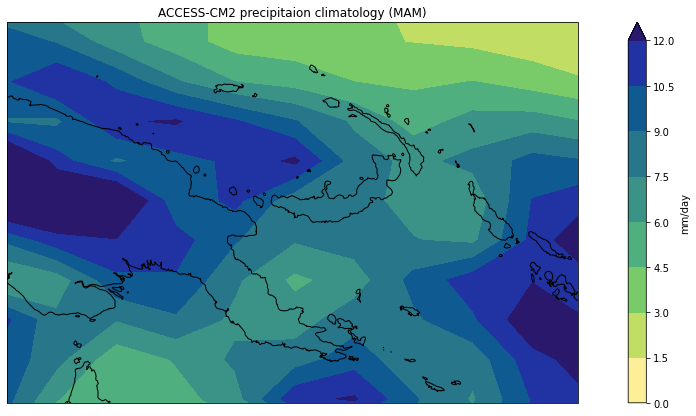

In [5]:
plot_pr_climatology('data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc', 'MAM')

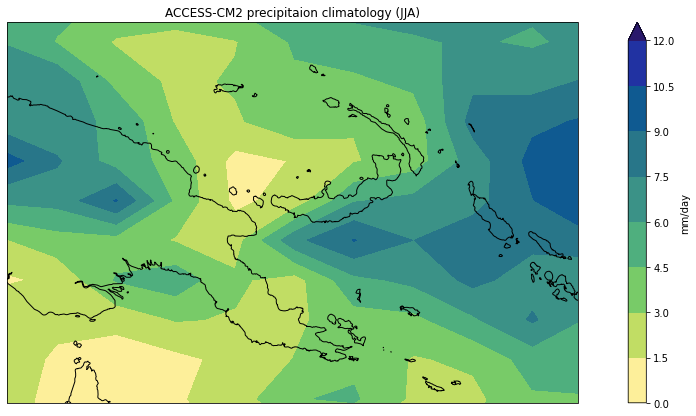

In [6]:
plot_pr_climatology('data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc', 'JJA')

In [6]:
def plot_pr_climatology(pr_file, season, gridlines = False):
    """Plots The Precipitaion Climatology.

    Args:
        pr_file (str): precipitaion data file
        season (str): season (3 letter abbreviation e. g. JJA)
        gridlines (bool): selects whether True or False
    """
    #accesscm2_pr_file = 'data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'
    #rain_anom = 'rain.forecast.anom.monthly.nc'
    
    dset = xr.open_dataset(pr_file)

    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)

    clim.data = clim.data * 86400
    clim.attrs['units'] = 'mm/day'

    fig = plt.figure(figsize=[18,7])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

    clim.sel(season=season).plot.contourf( 
        ax=ax,
        levels=np.arange(0, 13.5, 1.5),
        extend='max',
        transform=ccrs.PlateCarree(),
        cbar_kwargs={'label': clim.units},
       cmap=cmocean.cm.haline_r
    )
    ax.coastlines()

    if gridlines:
        plt.gca().gridlines()

    model = dset.attrs['source_id']
    title = f'{model} precipitaion climatology ({season})'
    plt.title(title)

    plt.show() 